# Keane and Wolpin (1997)

*Note that most of the code cells are hidden from this notebook for a better reading flow. Check out the notebook in the documentation folder in the Github repository for more details.*

In the following, we will replicate the base and extended model from Keane and Wolpin (1997) and present occupational choice of agents from the age of sixteen to 65.

In [ ]:
%matplotlib agg

import respy as rp
import pandas as pd
import matplotlib.pyplot as plt

pd.set_option("display.max_rows", 100)

In [ ]:
plt.style.use("../_static/respy.mplstyle")

In [3]:
params, options, actual_df = rp.get_example_model("kw_97_basic")

In [17]:
params = pd.read_csv("../../kw_97_basic_estimated.csv", index_col=["category", "name"])["value"]

In [7]:
# Get simulated data from the basic model.
simulate = rp.get_simulate_func(params, options)

In [8]:
basic_df = simulate(params)

# Get simulated data from the static model.
# params.loc[("delta", "delta"), "value"] = 0
# static_df = simulate(params)

# Get simulated data from the extended model.
# params, options = rp.get_example_model("kw_97_extended", with_data=False)
# simulate = rp.get_simulate_func(params, options)
# extended_df = simulate(params)

In [18]:
params

category            name                         
delta               delta                                0.78700
wage_white_collar   constant                             8.81300
                    exp_school                           0.09380
                    exp_white_collar                     0.15100
                    exp_white_collar_square             -0.06755
                    exp_blue_collar                      0.09317
                    exp_military                         0.01061
wage_blue_collar    constant                             8.58600
                    exp_school                           0.01584
                    exp_white_collar                     0.09594
                    exp_blue_collar                      0.17800
                    exp_blue_collar_square              -0.13300
                    exp_military                         0.14400
wage_military       constant                             8.23700
                    exp_school          

In [9]:
pd.crosstab(
    basic_df.loc[basic_df.Period.eq(0), "Type"],
    basic_df.loc[basic_df.Period.eq(0), "Experience_School"] >= 10,
    normalize="columns"
).T

Type,0,1,2,3
Experience_School,,,,
False,0.075758,0.429027,0.417065,0.078150
True,0.136946,0.160171,0.567005,0.135878


In [19]:
basic_df.

,Identifier,Period,Choice,Wage,Experience_Blue_Collar,Experience_Military,Experience_White_Collar,Experience_School,Type,Nonpecuniary_Reward_Blue_Collar,...,Value_Function_Military,Value_Function_White_Collar,Value_Function_School,Value_Function_Home,Shock_Reward_Blue_Collar,Shock_Reward_Military,Shock_Reward_White_Collar,Shock_Reward_School,Shock_Reward_Home,Discount_Rate
0,0,0,white_collar,2.359762e+04,0,0,0,10,2,0.0,...,1.001450e+05,1.178859e+05,1.142308e+05,8.412946e+04,0.833271,1.371136,1.122357,1333.410402,-7298.723172,0.787
1,0,1,white_collar,1.404374e+04,0,0,1,10,2,0.0,...,1.116613e+05,1.343717e+05,1.272004e+05,1.232896e+05,0.725156,0.994093,1.071249,-303.965701,18724.565874,0.787
2,0,2,white_collar,5.770520e+03,0,0,2,10,2,0.0,...,1.251259e+05,1.490628e+05,1.468615e+05,1.303342e+05,0.659296,0.616524,0.744520,2692.743973,10664.319987,0.787
3,0,3,white_collar,3.218131e+04,0,0,3,10,2,0.0,...,1.429511e+05,1.841126e+05,1.612589e+05,1.331912e+05,0.506052,0.621523,1.545236,-2290.836586,-4090.874169,0.787
4,0,4,white_collar,1.067144e+04,0,0,4,10,2,0.0,...,1.676264e+05,1.972949e+05,1.844018e+05,1.526012e+05,1.721445,1.533461,0.832618,-1283.110522,-4828.433883,0.787
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249995,4999,45,white_collar,3.213115e+06,0,0,44,10,2,0.0,...,5.965621e+06,1.068705e+07,6.491214e+06,5.884240e+06,0.567210,0.809069,1.918521,971.270776,-13224.421480,0.787
249996,4999,46,white_collar,1.517922e+06,0,0,45,10,2,0.0,...,5.256817e+06,8.264134e+06,5.718702e+06,5.200921e+06,1.774883,1.400398,1.070361,1571.168983,7348.009901,0.787
249997,4999,47,white_collar,2.954621e+06,0,0,46,10,2,0.0,...,4.168616e+06,6.862502e+06,4.536071e+06,4.116824e+06,1.165776,1.218625,0.894391,635.479894,-857.158453,0.787
249998,4999,48,white_collar,1.290944e+07,0,0,47,10,2,0.0,...,2.395743e+06,6.888014e+06,2.612599e+06,2.378157e+06,0.966384,0.644619,1.489823,757.172173,11840.538284,0.787


KeyError: 'military'

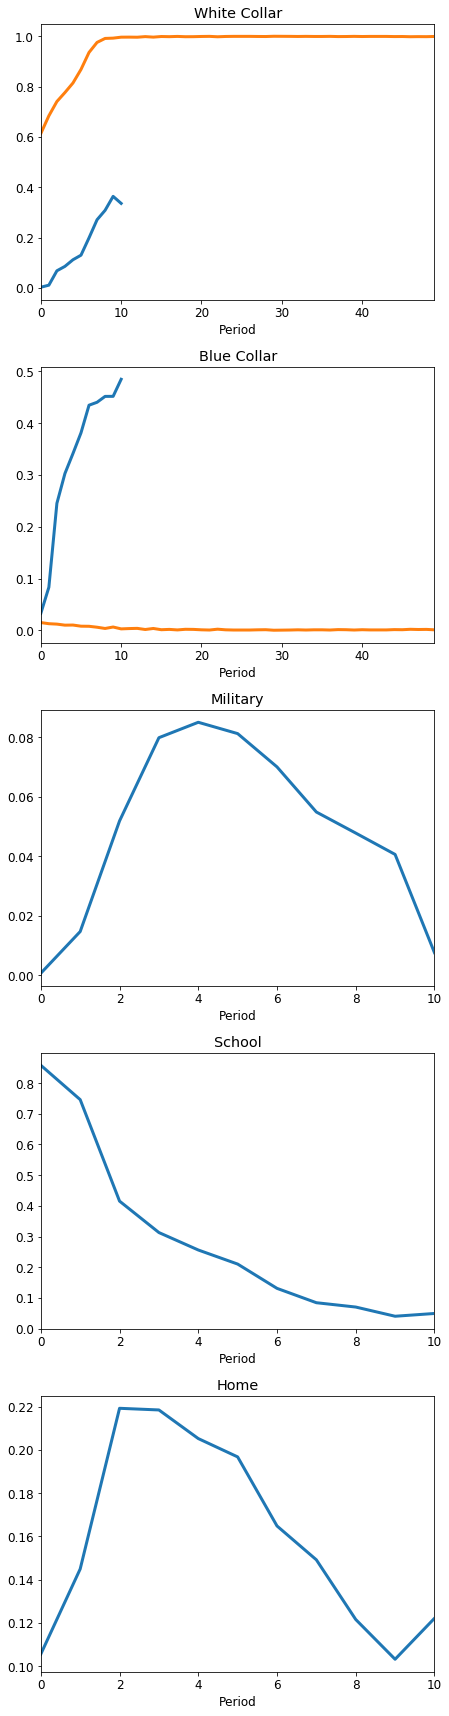

In [10]:
fig, axs = plt.subplots(5, figsize=(6.4, 4.8 * 5))  # figsize=(19.2, 14.4)
axs = axs.flatten()

labels = ["Actual", "Basic"] #, "Static"]  #, "Extended"]
dfs = [actual_df, basic_df] #, static_df]  # , extended_df]

for label, df in zip(labels, dfs):
    cp = df.groupby("Period").Choice.value_counts(normalize=True).unstack().fillna(0)
    for i, choice in enumerate(["white_collar", "blue_collar", "military", "school", "home"]):
        cp[choice].plot(ax=axs[i], label=label)
        axs[i].set_title(choice.replace("_", " ").title())

for ax in axs:
    ax.legend()
    ax.set_xlabel("Age")
    ax.set_ylabel("Share")
    ax.set_xticks(range(0, 51, 5))
    ax.set_xticklabels(range(15, 66, 5))

# axs[-1].axis("off")

# plt.ylim(0, 1)

In [ ]:
fig

In [ ]:
import numpy as np

In [ ]:
u_ws = np.load("u_ws.npy")
u = np.load("u.npy")
probs_ws = np.load("probs_ws.npy")
probs = np.load("probs.npy")
ten = np.load("ten.npy")

In [ ]:
np.bincount((u_ws < probs_ws.cumsum(axis=1)).argmax(1))

In [ ]:
np.bincount((u_ws < probs.cumsum(axis=1)).argmax(1))

In [ ]:
np.bincount((u < probs_ws.cumsum(axis=1)).argmax(1))

In [ ]:
np.bincount((u < probs.cumsum(axis=1)).argmax(1))

In [ ]:
np.array_equal(probs_ws, probs)

In [ ]:
(u_ws < 0.3).sum()

In [ ]:
(u < 0.3).sum()

In [ ]:
df = pd.DataFrame({"u": u.flatten(), "u_s": u_ws.flatten(), "ten": ten})

In [ ]:
df.u_s

In [ ]:
df[["u", "u_s"]].plot.kde()

In [ ]:
df.groupby("ten").plot.kde()

In [ ]:
np.random.seed(10)

for _ in range(5):
    print(np.random.random_sample())

In [ ]:
np.random.seed(10)

np.random.rand(5)